# Домашнее задание по статистическому анализу на python

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr
from sklearn import preprocessing
import seaborn as sns

Загрузить датасет по url:


In [175]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [176]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

#### Это равномерно распределение (как минимум стремится к нему)

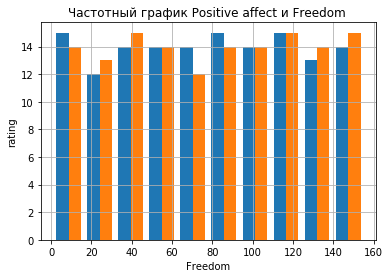

In [181]:
plt.hist([df['Positive affect'] , df['Freedom']], 10)
plt.xlabel('Freedom')
plt.ylabel('rating')
plt.title('Частотный график Positive affect и Freedom ')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [182]:
# Исходя из этого видно, что существуют Nan знаение, почистим датасет
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           140 non-null object
Ladder                     140 non-null int64
SD of Ladder               140 non-null int64
Positive affect            140 non-null float64
Negative affect            140 non-null float64
Social support             140 non-null float64
Freedom                    140 non-null float64
Corruption                 140 non-null float64
Generosity                 140 non-null float64
Log of GDP
per capita      140 non-null float64
Healthy life
expectancy    140 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.1+ KB


In [183]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

In [184]:
df = df.dropna()

In [185]:
statistics.mean(df['Freedom'])

78.82857142857142

In [186]:
statistics.median(df['Freedom'])

79.5

In [187]:
# statistics.mode(df['Freedom']) - мода отсутсвует т.к в выборке все значения уникальны
''' кол-во уникальных элементов равно кол-ву элементов в столбце'''
len(pd.unique(df['Freedom'])) == len(df['Freedom']) 

True

In [188]:
min(df['Freedom'])

1.0

In [189]:
max(df['Freedom'])

155.0

In [190]:
range_ = max(df['Freedom']) - min(df['Freedom'])
range_

154.0

In [191]:
statistics.pstdev(df['Freedom'])

44.9475794449399

In [192]:
statistics.pvariance(df['Freedom'])

2020.2848979591836

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

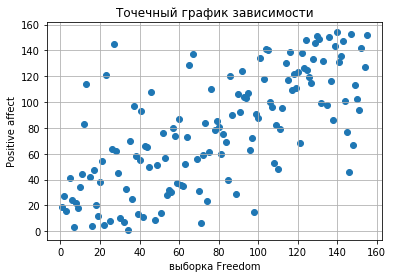

In [193]:
'''Заметно что корреляция между двумя показателями достаточно высокая'''
x = df['Freedom']
y = df['Positive affect']

plt.scatter(x, y)
plt.xlabel('выборка Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график зависимости')
plt.grid(True)

In [194]:
'''Коэффицент корреляции ~0.7 - связь между показателями высокая'''
corr, p_value = pearsonr(x, y)
corr

0.6965670458090686

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [195]:
freedom = df['Freedom']
freedom_centr = freedom - statistics.mean(freedom)

In [196]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(np.array(freedom).reshape(-1,1))
np_scaled[:10]

array([[-0.94805195],
       [-0.93506494],
       [-0.97402597],
       [-0.92207792],
       [-0.76623377],
       [-0.87012987],
       [-0.88311688],
       [-0.90909091],
       [-0.8961039 ],
       [-0.67532468]])

Построить матрицу корреляций для всех колонок таблицы

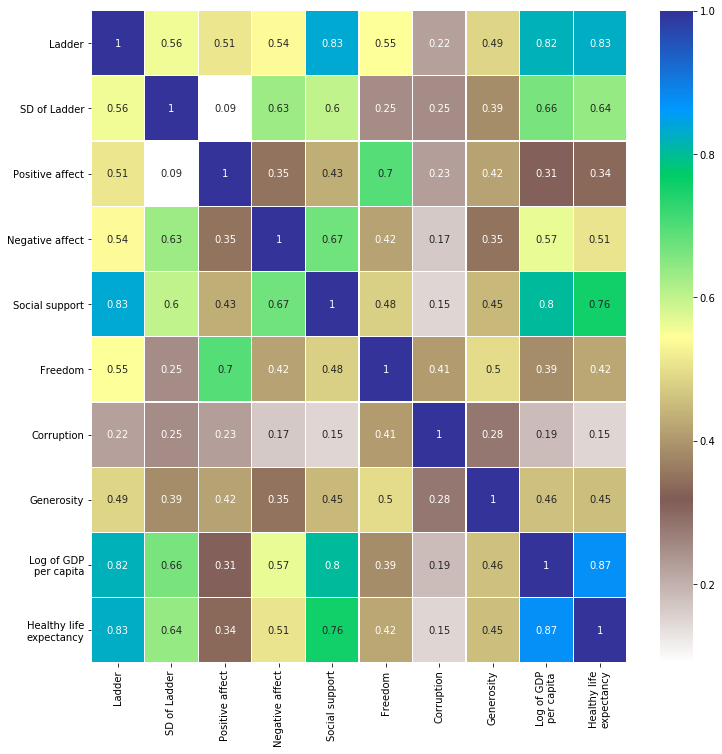

'Ожидаемо наиболее зависимы показатели, которые изначально предполагались как взаимозависимые \n(Log of GDP per capita,Healthy life expectancy)'

In [197]:
sns.heatmap(df.corr(), annot=True,cmap='terrain_r',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

'''Ожидаемо наиболее зависимы показатели, которые изначально предполагались как взаимозависимые 
(Log of GDP per capita,Healthy life expectancy)'''

Загрузить следующую таблицу: 

In [204]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df1=pd.read_csv(url)
df1[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

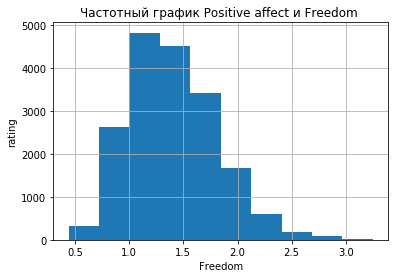

'Это нормальное распределение гаусса с небольшим эксцессом '

In [206]:
plt.hist([df1['AveragePrice']], 10)
plt.xlabel('Freedom')
plt.ylabel('rating')
plt.title('Частотный график Positive affect и Freedom ')
plt.grid(True)
plt.show()

'''Это нормальное распределение гаусса с небольшим эксцессом '''

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

<Figure size 1080x1080 with 0 Axes>

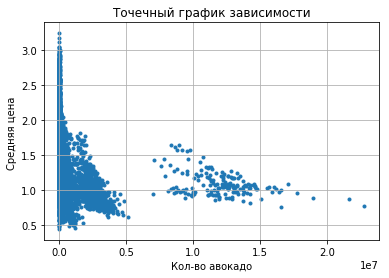

<Figure size 1080x1080 with 0 Axes>

In [207]:
x = df1['4046']
y = df1['AveragePrice']

plt.scatter(x, y, marker = '.')
plt.xlabel('Кол-во авокадо')
plt.ylabel('Средняя цена ')
plt.title('Точечный график зависимости')
plt.grid(True)
plt.figure(figsize=(15,15))

In [208]:
corr, p_value = pearsonr(x, y)
corr

-0.20831704848788477

#### Взаимосвязь между средней ценой и кол-вом авокадо 4046 кране низкая, в самой левой части графика наблюдается всплекс, вероятно, это стоит расценивать как выброс

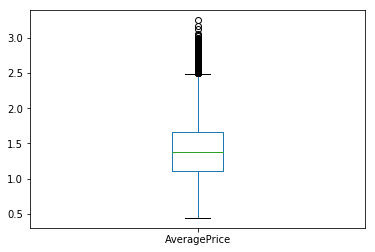

In [212]:
''' Анализирую боксплот видно, что правда есть выброс, вероятно после очистки (от 5% до 95%), график будет репрезентативней '''
df1['AveragePrice'].plot(kind='box')